In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
def plot_profiles(channels, colors, COLOR, sec_axis=False, save=False, title="", plot_size="big"):
    px_size=0.1625

    # Edit the font, font size, color and axes width
    
    if plot_size == "small":
        plt.rcParams['font.size'] = 10
        plt.rcParams['axes.linewidth'] = 0.5
        fig_width=2
        fig_height=1.5
        tick_size=3
        
    else:
        plt.rcParams['font.size'] = 18
        plt.rcParams['axes.linewidth'] = 1
        fig_width=5
        fig_height=4
        tick_size=7

    
    mpl.rcParams['font.family'] = 'Arial'
    

    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['axes.edgecolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR

    # Make text editable in illustrator
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42

    # Create figure object and store it in a variable called 'fig'
    fig = plt.figure(figsize=(fig_width, fig_height))

    # Add axes object to the figure that takes up entire figure
    ax = fig.add_axes([0, 0, 1, 1])

    # Edit the major and minor ticks of the x and y axes
    ax.xaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')

    # Add the x and y-axis labels
    ax.set_xlabel(r'Position ($\mathregular{\mu}$m)', labelpad=10)
    


    if (len(channels)==2) and (sec_axis==True):

        profile_first = pd.read_csv(channels[0]+".csv")
        profile_second = pd.read_csv(channels[1]+".csv")
        x_axis = np.arange(0, len(profile_first))*px_size
        ax.plot(x_axis, profile_first.Gray_Value, linewidth=plt.rcParams['axes.linewidth']*2, color=colors[0], alpha=1, label=channels[0])

        ax2 = ax.twinx()
        ax2.plot(x_axis, profile_second.Gray_Value, linewidth=plt.rcParams['axes.linewidth']*2, color=colors[1], alpha=1, label=channels[1])
        
        ax.set_ylabel(channels[0] + ' signal intensity', labelpad=10)
        ax2.set_ylabel(channels[1] + ' signal intensity', labelpad=10)


    else:
        for channel, color in zip(channels, colors):

            profile = pd.read_csv(channel+".csv")
            x_axis = np.arange(0, len(profile))*px_size

            ax.plot(x_axis, profile.Gray_Value, linewidth=plt.rcParams['axes.linewidth']*2, color=color, alpha=1, label=channel)
    
        ax.set_ylabel('Intensity', labelpad=10)
        ax.legend(bbox_to_anchor=(1, 1), loc='upper left', prop={'size': 15}, fancybox=True, framealpha=0.0)

    if save==True:
        fig.savefig(f'{title}_{COLOR}_{plot_size}.pdf', dpi=300, transparent=True, bbox_inches='tight')
        fig.savefig(f'{title}_{COLOR}_{plot_size}.png', dpi=300, transparent=True, bbox_inches='tight')
    

    

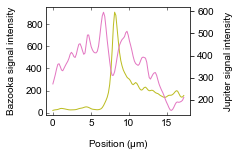

In [13]:
channels = ["Bazooka", "Jupiter"]
colors = [sns.color_palette()[-2], sns.color_palette()[-4]]
COLOR = "black"
plot_profiles(channels, colors, COLOR, sec_axis=True, save=True, title="deatachment_cross_section", plot_size="small")